# **Common code**

In [ ]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
dataset =  pd.read_csv("/content/drive/MyDrive/Customer_Churn/Cleaned_data_24_10_22.csv")
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = dataset[['Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited']].copy()
df.head(5)

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,42,2,0.00,1,1,1,1
1,2,0,41,1,83807.86,1,0,1,0
2,0,0,42,8,159660.80,3,1,0,1
3,0,0,39,1,0.00,2,0,0,0
4,2,0,43,2,125510.82,1,1,1,0


In [ ]:
df.shape

(15682, 9)

In [ ]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# **Repeated 50:50**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.50, random_state=1)

In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
dt_model1 = RandomizedSearchCV(tree, param_dist, cv=10)
# Fit it to the data
dt_model1.fit(X,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27fe894e80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27fe8af310>})

In [ ]:
dt_best = dt_model1.best_estimator_


# **Never Delete**

In [ ]:
# from sklearn.tree import plot_tree # tree diagram
# from matplotlib import rcParams # figure size

# rcParams['figure.figsize'] = (50, 50)

# feature_names = df.columns[:8]
# target_names = str(df['Exited'].unique().tolist())

# plot_tree(dt_best, 
#           feature_names = feature_names, 
#           class_names = target_names, 
#           filled = True, 
#           rounded = True)

# plt.savefig('/content/drive/MyDrive/Customer_Churn/tree_visualization.png') 

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(dt_model1.best_params_))
print("Best score is {}".format(dt_model1.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.8102371278339252


In [ ]:
dt_cv_predict_train1 = dt_model1.predict(X_train1)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train1, dt_cv_predict_train1)))
print()

Accuracy against training data: 0.8638



In [ ]:
dt_cv_predict_test1 = dt_model1.predict(X_test1)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test1, dt_cv_predict_test1)))
print()

Accuracy against test data: 0.8706



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test1, dt_cv_predict_test1))
print()

Confusion Matrix
[[3433  467]
 [ 548 3393]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test1, dt_cv_predict_test1))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3900
           1       0.88      0.86      0.87      3941

    accuracy                           0.87      7841
   macro avg       0.87      0.87      0.87      7841
weighted avg       0.87      0.87      0.87      7841




# **Repeatable 80:20**

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
dt_model2 = RandomizedSearchCV(tree, param_dist, cv=10)
# Fit it to the data
dt_model2.fit(X,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27fe894e80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27fe8af310>})

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(dt_model2.best_params_))
print("Best score is {}".format(dt_model2.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5}
Best score is 0.8036037431224881


In [ ]:
dt_cv_predict_train2 = dt_model2.predict(X_train2)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train2, dt_cv_predict_train2)))
print()

Accuracy against training data: 0.8866



In [ ]:
dt_cv_predict_test2 = dt_model2.predict(X_test2)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test2, dt_cv_predict_test2)))
print()

Accuracy against test data: 0.8852



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test2, dt_cv_predict_test2))
print()

Confusion Matrix
[[1402  159]
 [ 201 1375]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test2, dt_cv_predict_test2))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1561
           1       0.90      0.87      0.88      1576

    accuracy                           0.89      3137
   macro avg       0.89      0.89      0.89      3137
weighted avg       0.89      0.89      0.89      3137




# **Stratified 50:50**

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.50, random_state=1,stratify=y)

In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
dt_model3 = RandomizedSearchCV(tree, param_dist, cv=10)
# Fit it to the data
dt_model3.fit(X,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27fe894e80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27fe8af310>})

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(dt_model3.best_params_))
print("Best score is {}".format(dt_model3.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 7}
Best score is 0.8089605608017585


In [ ]:
dt_cv_predict_train3 = dt_model3.predict(X_train3)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train3, dt_cv_predict_train3)))
print()

Accuracy against training data: 0.8703



In [ ]:
dt_cv_predict_test3 = dt_model3.predict(X_test3)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test3, dt_cv_predict_test3)))
print()

Accuracy against test data: 0.8782



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test3, dt_cv_predict_test3))
print()

Confusion Matrix
[[3492  428]
 [ 527 3394]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test3, dt_cv_predict_test3))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3920
           1       0.89      0.87      0.88      3921

    accuracy                           0.88      7841
   macro avg       0.88      0.88      0.88      7841
weighted avg       0.88      0.88      0.88      7841




# **Stratified 80:20**

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
dt_model4 = RandomizedSearchCV(tree, param_dist, cv=10)
# Fit it to the data
dt_model4.fit(X,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27fe894e80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27fe8af310>})

In [ ]:
print("Tuned Decision Tree Parameters: {}".format(dt_model4.best_params_))
print("Best score is {}".format(dt_model4.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 8}
Best score is 0.795381579974246


In [ ]:
dt_cv_predict_train4 = dt_model4.predict(X_train4)
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train4, dt_cv_predict_train4)))
print()

Accuracy against training data: 0.8426



In [ ]:
dt_cv_predict_test4 = dt_model4.predict(X_test4)
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test4, dt_cv_predict_test4)))
print()

Accuracy against test data: 0.8457



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test4, dt_cv_predict_test4))
print()

Confusion Matrix
[[1357  211]
 [ 273 1296]]



In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test4, dt_cv_predict_test4))
print()

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1568
           1       0.86      0.83      0.84      1569

    accuracy                           0.85      3137
   macro avg       0.85      0.85      0.85      3137
weighted avg       0.85      0.85      0.85      3137




# **AUC-ROC**

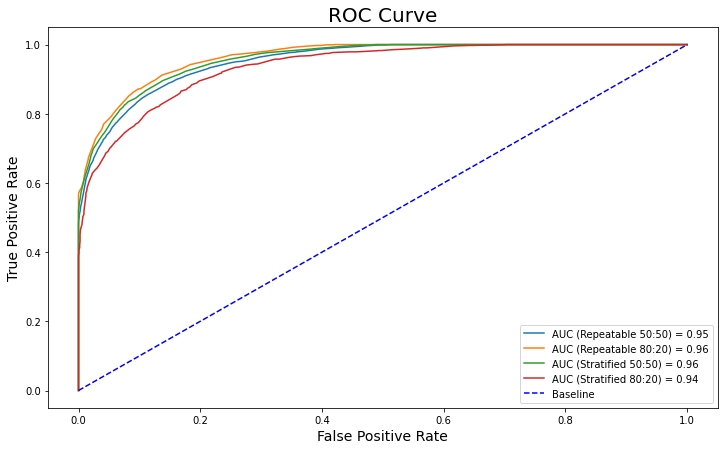

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_m1 = dt_model1.predict_proba(X_test1)[:, 1]
probs_m2 = dt_model2.predict_proba(X_test2)[:, 1]
probs_m3 = dt_model3.predict_proba(X_test3)[:, 1]
probs_m4 = dt_model4.predict_proba(X_test4)[:, 1]


# y_test_int = y_test.replace({'Exited': 1, 'Not Exited': 0})
auc_mod1 = roc_auc_score(y_test1, probs_m1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, probs_m1)

auc_mod2 = roc_auc_score(y_test2, probs_m2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test2, probs_m2)

auc_mod3 = roc_auc_score(y_test3, probs_m3)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test3, probs_m3)

auc_mod4 = roc_auc_score(y_test4, probs_m4)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test4, probs_m4)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Repeatable 50:50) = {auc_mod1:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Repeatable 80:20) = {auc_mod2:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Stratified 50:50) = {auc_mod3:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (Stratified 80:20) = {auc_mod4:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();